# image Classification 

## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

## Overview on the dataset

In [10]:
artist_arts_len = {artist : len(os.listdir(f'./selected_artist/{artist}')) for artist in os.listdir('./selected_artist') if artist != ".DS_Store"}

In [11]:
artist_arts_len

{'Alfred_Sisley': 260,
 'Francisco_Goya': 291,
 'Marc_Chagall': 239,
 'Paul_Gauguin': 311,
 'Paul_Klee': 188,
 'Rembrandt': 262,
 'Rene_Magritte': 194,
 'Titian': 256}

In [12]:
CLASS_NAMES= [artist for artist in os.listdir('./selected_artist') if artist != ".DS_Store"]

In [13]:
CLASS_NAMES

['Alfred_Sisley',
 'Francisco_Goya',
 'Marc_Chagall',
 'Paul_Gauguin',
 'Paul_Klee',
 'Rembrandt',
 'Rene_Magritte',
 'Titian']

In [25]:
def show_img_jupyter(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [26]:
def resizing_square(path, dim):
    origin_img = cv2.imread(path)
    return cv2.resize(origin_img, (dim, dim))

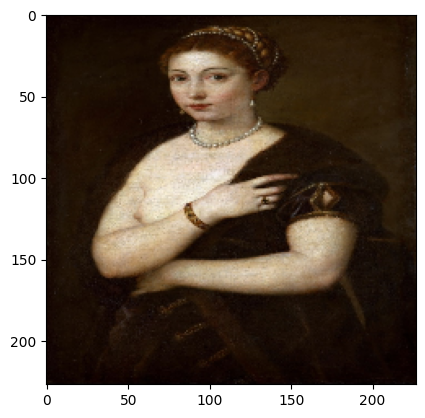

In [27]:
show_img_jupyter(resizing_square(path, 227))